In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

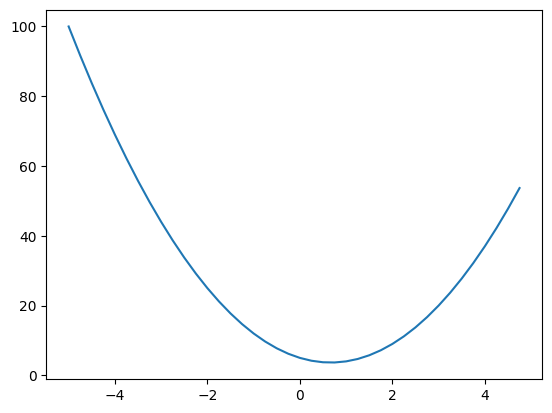

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [6]:
#inputs

a = 2.0
b= -3.0
c = 10.0

#output

d = a*b + c
print(d)

print("__________")

#limit tends to zero (h)
h = 0.0001

#slopes
d1 = a*b +c
a+=h #derivative of d wrt a (therefore bumped up a)
d2 = a*b + c

#slope calculation
print('d1: ',d1)
print('d2: ',d2)
print('slope: ', (d2 - d1) / h )



4.0
__________
d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


In [7]:
#slopes
d1 = a*b +c
b+=h #derivative of d wrt b (therefore bumped up b)
d2 = a*b + c

#slope calculation
print('d1: ',d1)
print('d2: ',d2)
print('slope: ', (d2 - d1) / h )

d1:  3.999699999999999
d2:  3.99990001
slope:  2.0001000000124947


#slopes
d1 = a*b +c
c+=h #derivative of d wrt c (therefore bumped up c)
d2 = a*b + c

#slope calculation
print('d1: ',d1)
print('d2: ',d2)
print('slope: ', (d2 - d1) / h )

THIS WAS THE BASICS OF DIFFERENTIATION
NOW WE JUMP INTO DEFINING FUNCTIONS THAT HELP US ACHIEVE WHAT WE WANT EASILY

In [37]:
class Value:
    def __init__(self,data, _children=(), _op = '', label = ''): 
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        

        
# Children keeps track of what values produces what other values
# prev is a set that tracks of the previous values
# op keeps track of the operations' labels for the user to understand easily
# label helps us keep track of variable names 

    def __repr__(self): #If this is not present, the values would be printed out in an ugly manner
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') #adding and feeding the children and previous values
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*') #adding and feeding the children and previous values
        return out

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'

In [9]:
#a+b
a.__add__(b)

Value(data = -1.0)

In [10]:
#a*b
a.__mul__(b)

Value(data = -6.0)

In [31]:
d = a*b + c
(a.__mul__(b)).__add__(c)

Value(data = 4.0)

In [12]:
d._prev #prints the previous values that were required to get to this number

{Value(data = -6.0), Value(data = 10.0)}

In [13]:
d._op #prints the previous operations that were required to get to this number

'+'

NOW TO VISUALISE ALL OF THIS WITH THE HELP OF A GRAPH, HERE'S THE CODE THAT HELPS US BUILD THE GRAPH USING GRAPHVIZ

In [38]:
from graphviz import Digraph

def trace(root):
    #builds a set of all the nodes and edges in the graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir': 'LR'}) #LR - left to right

    nodes, edges= trace(root)
    for n in nodes:
        uid = str(id(n))
        #for value in the graph, create a rectangular record for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape = 'record')

        if n._op:
            # if this value is a result of some operation, create a node for it
            dot.node(name = uid + n._op, label = n._op)
            #and connect this with an edge
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #connecting n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

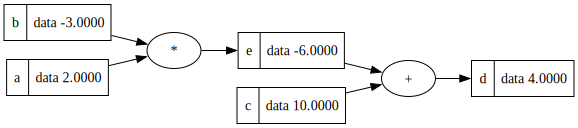

In [39]:
draw_dot(d)

In [41]:
f = Value(-2.0, label = 'f')
l = d * f; l.label = 'L'
l

Value(data = -8.0)

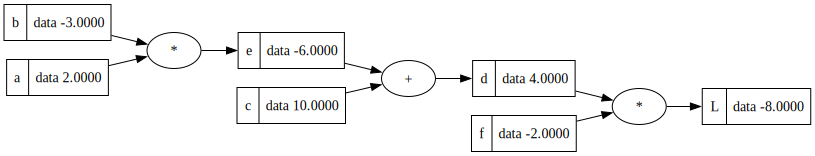

In [43]:
draw_dot(l)

NOW WE WILL CONTINUE THE REST OF THE THINGS IN "karpathy 002". ALL WHILE COPYING THE MAIN CODES FROM THIS FILE.
